In [ ]:
%%capture
!pip install MiniSom

import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import IsolationForest
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from minisom import MiniSom
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from scipy.spatial.distance import mahalanobis
from sklearn.covariance import EmpiricalCovariance
from IPython.display import HTML

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, balanced_accuracy_score, precision_recall_curve, average_precision_score, fbeta_score, make_scorer, f1_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier


np.random.seed(42)

In [ ]:
column_names = [
    'Status of existing checking account', 'Duration in month', 'Credit history',
    'Purpose', 'Credit amount', 'Savings account/bonds', 'Present employment since',
    'Installment rate in percentage of disposable income', 'Personal status and sex',
    'Other debtors / guarantors', 'Present residence since', 'Property', 'Age in years',
    'Other installment plans', 'Housing', 'Number of existing credits at this bank',
    'Job', 'Number of people being liable to provide maintenance for', 'Telephone',
    'foreign worker', 'Good/Bad'
]

df = pd.read_csv('german.data', delim_whitespace=True, header=None, names=column_names)
df

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Good/Bad
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


# inicio

In [ ]:
df2 = df.copy()
df2

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Good/Bad
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [ ]:
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]
X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
categorical_columns = ['Status of existing checking account', 'Credit history', 'Purpose', 'Savings account/bonds',
                        'Present employment since', 'Personal status and sex', 'Other debtors / guarantors',
                        'Property', 'Other installment plans', 'Housing', 'Job', 'Telephone', 'foreign worker']

encoder = OneHotEncoder(drop='first', sparse_output=False).set_output(transform="pandas")

encoder.fit(X_train2[categorical_columns])

X_train_encoded2 = encoder.transform(X_train2[categorical_columns])
X_val_encoded2 = encoder.transform(X_val2[categorical_columns])

In [ ]:
numerical_columns = ['Duration in month', 'Credit amount', 'Installment rate in percentage of disposable income', 'Present residence since',
                     'Age in years', 'Number of existing credits at this bank', 'Number of people being liable to provide maintenance for']


scaler = StandardScaler()

X_train_scaled2 = X_train_encoded2.copy()
X_train_scaled2[numerical_columns] = scaler.fit_transform(X_train2[numerical_columns])

X_val_scaled2 = X_val_encoded2.copy()
X_val_scaled2[numerical_columns] = scaler.transform(X_val2[numerical_columns])

In [ ]:
X2 = X_train_scaled2.copy()
X2

,Status of existing checking account_A12,Status of existing checking account_A13,Status of existing checking account_A14,Credit history_A31,Credit history_A32,Credit history_A33,Credit history_A34,Purpose_A41,Purpose_A410,Purpose_A42,...,Job_A174,Telephone_A192,foreign worker_A202,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
29,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3.297082,1.199912,0.031196,1.044509,2.406187,1.017777,-0.409736
535,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.008051,-0.359630,-0.860109,-1.671440,-0.224364,-0.710931,-0.409736
695,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,-1.279256,-0.733547,-0.860109,1.044509,1.266282,-0.710931,-0.409736
557,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.008051,0.567050,-1.751413,1.044509,-0.575104,1.017777,-0.409736
836,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.770774,-0.854388,0.922500,-0.766124,-1.276585,-0.710931,-0.409736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,-0.262292,1.069404,-0.860109,1.044509,0.301746,1.017777,2.440599
270,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.262292,-0.241206,0.922500,0.139192,-0.312049,-0.710931,-0.409736
860,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.246190,0.843603,0.922500,-0.766124,-0.750474,1.017777,-0.409736
435,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.770774,-0.647923,-0.860109,-1.671440,-0.925844,-0.710931,-0.409736


Explained variation per principal component: [0.14740416 0.12935866 0.09180456 0.086846   0.07711477 0.06132206
 0.03213921 0.03027193 0.02564754 0.02516163]


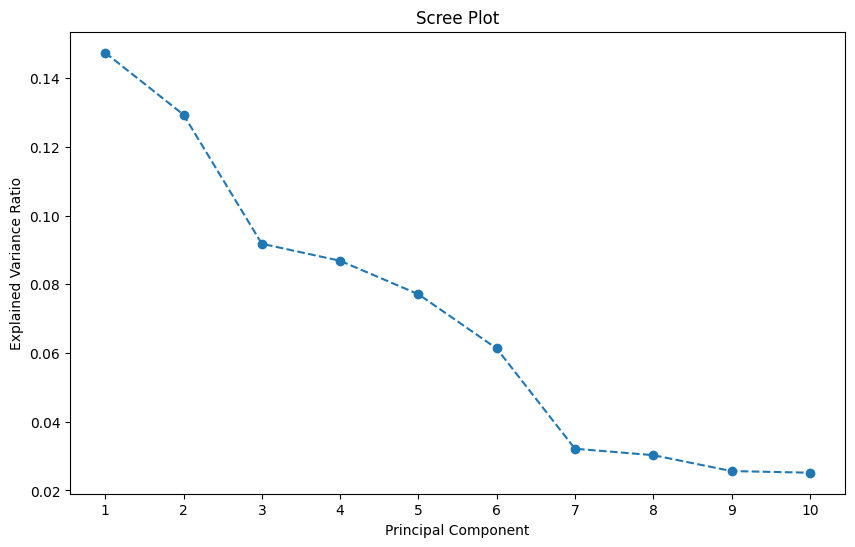

In [ ]:
pca = PCA(n_components=10)
X2_pca = pca.fit_transform(X2)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, pca.n_components_ + 1))
plt.show()

In [ ]:
desired_variance = 0.75

pca = PCA()
X2_pca = pca.fit_transform(X2)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

n_components = np.argmax(cumulative_variance_ratio >= desired_variance) + 1

pca = PCA(n_components=n_components)
X2_pca = pca.fit_transform(X2)

print(f'Number of components needed to explain {desired_variance*100}% variance: {n_components}')
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Number of components needed to explain 75.0% variance: 12
Explained variation per principal component: [0.14740416 0.12935866 0.09180456 0.086846   0.07711477 0.06132206
 0.03213921 0.03027193 0.02564754 0.02516163 0.02374665 0.02267415]


In [ ]:
labels = pd.DataFrame(columns = ['k-means', 'Agglomerative', 'Isolation Forest', 'DBSCAN','SOM_cluster', 'LOF', 'OneClassSVM', 'Mahalanobis'])

labels = labels.reindex(X2.index)

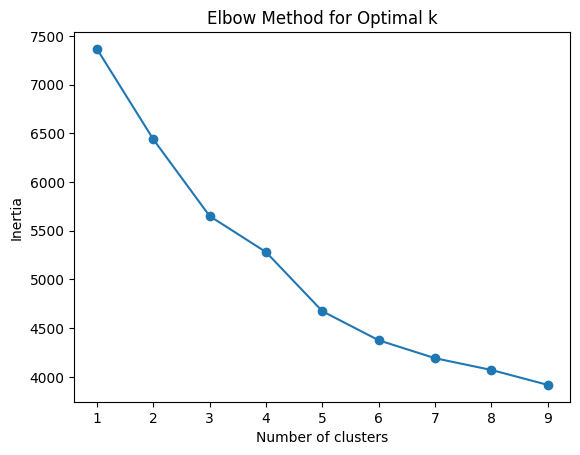

In [ ]:
inertia = []
for num_clusters in list(range(1, 10)):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans.fit(X2_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
y_train2_converted = y_train2.apply(lambda x: 1 if x == 2 else 0)
y_val2_converted = y_val2.apply(lambda x: 1 if x == 2 else 0)

In [ ]:
k = 2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(X2_pca)
clusters = np.where(clusters == 0, 1, 0)

labels['k-means'] = clusters

In [ ]:
f2_scores = fbeta_score(y_train2_converted, labels['k-means'], beta=2, average=None)
print('F2 Score:')
print(f'Class Good (0): {round(f2_scores[0], 2)}')
print(f'Class Bad (1): {round(f2_scores[1], 2)}')

f2_score = fbeta_score(y_train2_converted, labels['k-means'], beta=2, average='macro')
print('Macro avg:', round(f2_score, 2))
f2_score = fbeta_score(y_train2_converted, labels['k-means'], beta=2, average='weighted')
print('Weighted avg:', round(f2_score, 2))

rate = (f2_scores[1] + f2_score)/2
print('Rate: ', round(rate,2))

cm = confusion_matrix(y_train2_converted, labels['k-means'],  labels=[1, 0])
print('Confusion Matrix:\n', cm)
report = classification_report(y_train2_converted, labels['k-means'], target_names=['Good (0)', 'Bad (1)'])
print('Classification Report:\n', report)

balanced_acc = balanced_accuracy_score(y_train2_converted, labels['k-means'])
print(f'Balanced Accuracy: {balanced_acc:.2f}')
ba_kmeans = f2_score

F2 Score:
Class Good (0): 0.79
Class Bad (1): 0.37
Macro avg: 0.58
Weighted avg: 0.66
Rate:  0.52
Confusion Matrix:
 [[ 86 155]
 [111 448]]
Classification Report:
               precision    recall  f1-score   support

    Good (0)       0.74      0.80      0.77       559
     Bad (1)       0.44      0.36      0.39       241

    accuracy                           0.67       800
   macro avg       0.59      0.58      0.58       800
weighted avg       0.65      0.67      0.66       800

Balanced Accuracy: 0.58


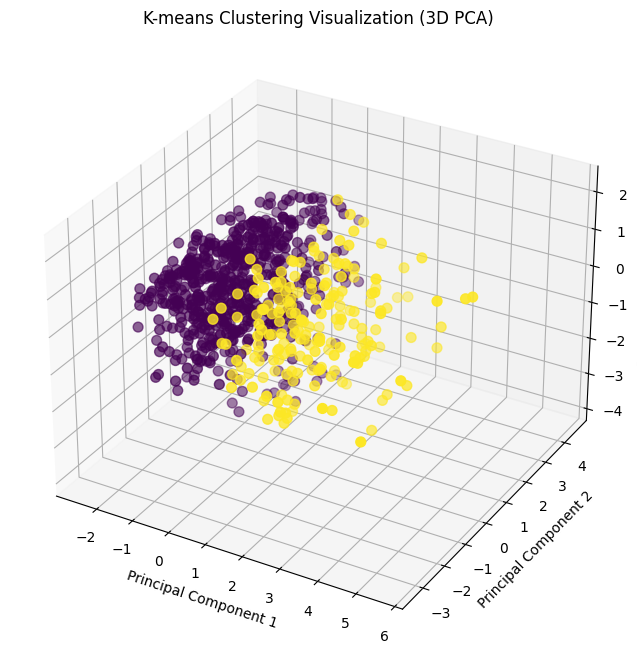

In [ ]:
pca = PCA(n_components=3)
X2_pca_3d = pca.fit_transform(X2_pca)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X2_pca_3d[:, 0], X2_pca_3d[:, 1], X2_pca_3d[:, 2], c=clusters, cmap='viridis', s=50)

ax.set_title('K-means Clustering Visualization (3D PCA)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [ ]:
model = IsolationForest(contamination=0.5, random_state=42)

model.fit(X2_pca)
predictions = model.predict(X2_pca)

predictions = np.where(predictions == -1, 1, 0)

labels['Isolation Forest'] = predictions

In [ ]:
f2_scores = fbeta_score(y_train2_converted, labels['Isolation Forest'], beta=2, average=None)
print('F2 Score:')
print(f'Class Good (0): {round(f2_scores[0], 2)}')
print(f'Class Bad (1): {round(f2_scores[1], 2)}')
f2_score = fbeta_score(y_train2_converted, labels['Isolation Forest'], beta=2, average='macro')
print('Macro avg:', round(f2_score, 2))
f2_score = fbeta_score(y_train2_converted, labels['Isolation Forest'], beta=2, average='weighted')
print('Weighted avg:', round(f2_score, 2))

rate = (f2_scores[1] + f2_score)/2
print('Rate: ', round(rate,2))

cm = confusion_matrix(y_train2_converted, labels['Isolation Forest'],  labels=[1, 0])
print('Confusion Matrix:\n', cm)
report = classification_report(y_train2_converted, labels['Isolation Forest'], target_names=['Good (0)', 'Bad (1)'])
print('Classification Report:\n', report)

balanced_acc = balanced_accuracy_score(y_train2_converted, labels['Isolation Forest'])
print(f'Balanced Accuracy: {balanced_acc:.2f}')
ba_is = f2_score

F2 Score:
Class Good (0): 0.56
Class Bad (1): 0.49
Macro avg: 0.53
Weighted avg: 0.54
Rate:  0.52
Confusion Matrix:
 [[135 106]
 [265 294]]
Classification Report:
               precision    recall  f1-score   support

    Good (0)       0.73      0.53      0.61       559
     Bad (1)       0.34      0.56      0.42       241

    accuracy                           0.54       800
   macro avg       0.54      0.54      0.52       800
weighted avg       0.62      0.54      0.56       800

Balanced Accuracy: 0.54


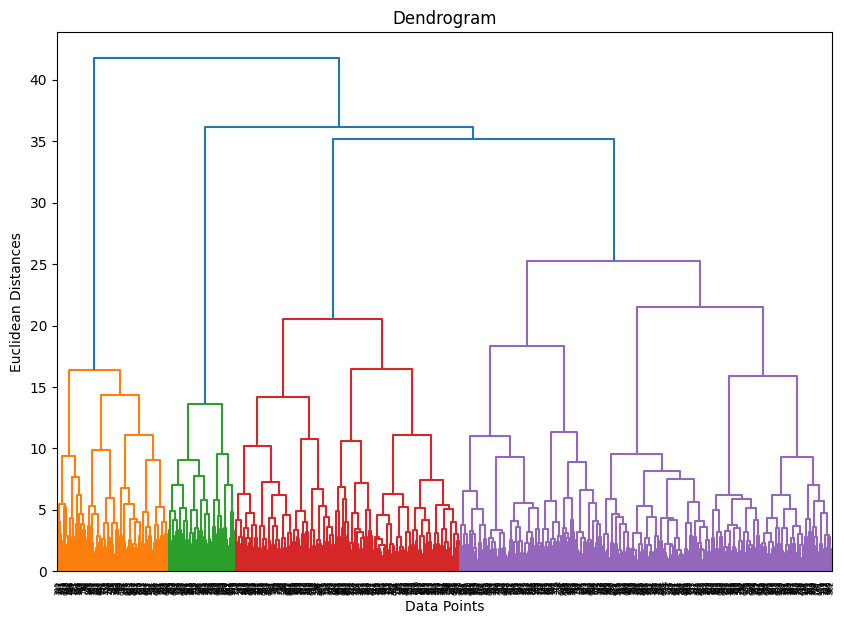

In [ ]:
hc = AgglomerativeClustering(n_clusters=2,
                            metric='cosine',
                            linkage='average',
                             distance_threshold=None)
y_hc = hc.fit_predict(X2_pca)
y_hc = np.where(y_hc == 0, 1, 0)

labels['Agglomerative'] = y_hc

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X2_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [ ]:
f2_scores = fbeta_score(y_train2_converted, labels['Agglomerative'], beta=2, average=None)
print('F2 Score:')
print(f'Class Good (0): {round(f2_scores[0], 2)}')
print(f'Class Bad (1): {round(f2_scores[1], 2)}')

f2_score = fbeta_score(y_train2_converted, labels['Agglomerative'], beta=2, average='macro')
print('Macro avg:', round(f2_score, 2))
f2_score = fbeta_score(y_train2_converted, labels['Agglomerative'], beta=2, average='weighted')
print('Weighted avg:', round(f2_score, 2))

rate = (f2_scores[1] + f2_score)/2
print('Rate: ', round(rate,2))

cm = confusion_matrix(y_train2_converted, labels['Agglomerative'],  labels=[1, 0])
print('Confusion Matrix:\n', cm)
report = classification_report(y_train2_converted, labels['Agglomerative'], target_names=['Good (0)', 'Bad (1)'])
print('Classification Report:\n', report)

balanced_acc = balanced_accuracy_score(y_train2_converted, labels['Agglomerative'])
print(f'Balanced Accuracy: {balanced_acc:.2f}')
ba_agg = f2_score

F2 Score:
Class Good (0): 0.73
Class Bad (1): 0.4
Macro avg: 0.57
Weighted avg: 0.63
Rate:  0.52
Confusion Matrix:
 [[ 98 143]
 [150 409]]
Classification Report:
               precision    recall  f1-score   support

    Good (0)       0.74      0.73      0.74       559
     Bad (1)       0.40      0.41      0.40       241

    accuracy                           0.63       800
   macro avg       0.57      0.57      0.57       800
weighted avg       0.64      0.63      0.64       800

Balanced Accuracy: 0.57


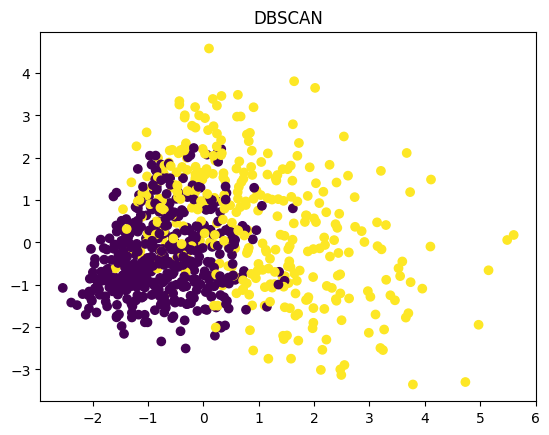

In [ ]:
dbscan = DBSCAN(eps=2.0, min_samples=24)
y_dbscan = dbscan.fit_predict(X2_pca)
y_dbscan = np.where(y_dbscan == -1, 1, 0)

labels['DBSCAN'] = y_dbscan

plt.scatter(X2_pca[:, 0], X2_pca[:, 1], c=y_dbscan, cmap='viridis')
plt.title('DBSCAN')
plt.show()

In [ ]:
f2_scores = fbeta_score(y_train2_converted, labels['DBSCAN'], beta=2, average=None)
print('F2 Score:')
print(f'Class Good (0): {round(f2_scores[0], 2)}')
print(f'Class Bad (1): {round(f2_scores[1], 2)}')
cm = confusion_matrix(y_train2_converted, labels['DBSCAN'],  labels=[1, 0])
print('Confusion Matrix:\n', cm)

f2_score = fbeta_score(y_train2_converted, labels['DBSCAN'], beta=2, average='macro')
print('Macro avg:', round(f2_score, 2))
f2_score = fbeta_score(y_train2_converted, labels['DBSCAN'], beta=2, average='weighted')
print('Weighted avg:', round(f2_score, 2))

rate = (f2_scores[1] + f2_score)/2
print('Rate: ', round(rate,2))

report = classification_report(y_train2_converted, labels['DBSCAN'], target_names=['Good (0)', 'Bad (1)'])
print('Classification Report:\n', report)

balanced_acc = balanced_accuracy_score(y_train2_converted, labels['DBSCAN'])
print(f'Balanced Accuracy: {balanced_acc:.2f}')
ba_dbscan = f2_score

F2 Score:
Class Good (0): 0.6
Class Bad (1): 0.45
Confusion Matrix:
 [[118 123]
 [239 320]]
Macro avg: 0.52
Weighted avg: 0.55
Rate:  0.5
Classification Report:
               precision    recall  f1-score   support

    Good (0)       0.72      0.57      0.64       559
     Bad (1)       0.33      0.49      0.39       241

    accuracy                           0.55       800
   macro avg       0.53      0.53      0.52       800
weighted avg       0.60      0.55      0.57       800

Balanced Accuracy: 0.53


Clusters associated with neurons having distance > 0.5:
[270, 619, 347, 512, 673, 620, 245, 41, 312, 779, 837, 165, 251, 471, 806, 717, 655, 101, 470, 373, 335, 361, 332, 392, 71, 486, 865, 579, 802, 128, 664, 471, 302, 334, 609, 125, 152, 241, 587, 830, 528, 564, 482, 395, 323, 87, 52, 405, 496, 537, 324, 472, 177, 487, 598, 625, 841, 63, 419, 332, 400, 735, 446, 320, 715, 62, 153, 483, 771, 619, 433, 616, 140, 62, 296, 543, 795, 621, 217, 392, 125, 173, 680, 579, 408, 852, 218, 865, 655, 440, 106, 491, 658, 127, 561, 444, 48, 847, 385, 137, 288, 356, 866, 237, 395, 116, 588, 227, 686, 207, 513, 857, 498, 517, 580, 560, 231, 17, 496, 594, 359, 355, 620, 830, 54, 138, 633, 636, 668, 500, 718, 518, 742, 116, 360, 72, 848, 796, 534, 139, 382, 557, 253, 385, 321, 314, 764, 679, 422, 305, 316, 416, 772, 761, 498, 727, 337, 295, 662, 183, 673, 765, 88, 807, 730, 390, 39, 821, 213, 595, 683, 644, 704, 706, 667, 638, 379, 280, 411, 507, 552, 160, 197, 743, 148, 549, 322, 812, 482, 363, 193, 2

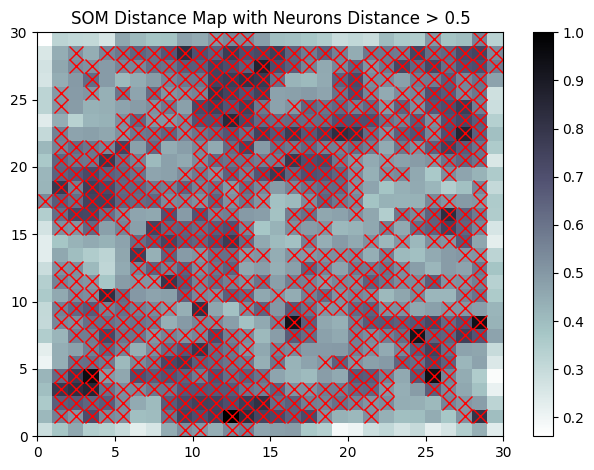

In [ ]:
data = X2_pca
som_shape = (30, 30)
sigma = 1.0
learning_rate = 0.5

som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(data)

som.train_random(data, 10000)

winner_coordinates = np.array([som.winner(x) for x in data]).T
cluster_labels = np.ravel_multi_index(winner_coordinates, som_shape)

Som_clustering = pd.Series(cluster_labels, index=labels.index)

distance_map = som.distance_map()

threshold = 0.5
high_distance_neurons = np.argwhere(distance_map > threshold)
clusters_above_threshold = []
for i, label in enumerate(cluster_labels):
    bmu = som.winner(data[i])
    if any(np.array_equal(bmu, coord) for coord in high_distance_neurons):
        clusters_above_threshold.append(label)

print(f"Clusters associated with neurons having distance > {threshold}:")
print(clusters_above_threshold)

plt.pcolor(distance_map.T, cmap='bone_r')
plt.colorbar()
plt.title('SOM Distance Map with Neurons Distance > 0.5')

for coord in high_distance_neurons:
    plt.plot(coord[0] + 0.5, coord[1] + 0.5, 'x', markersize=10, markeredgewidth=1, markeredgecolor='red')

plt.tight_layout()
plt.show()

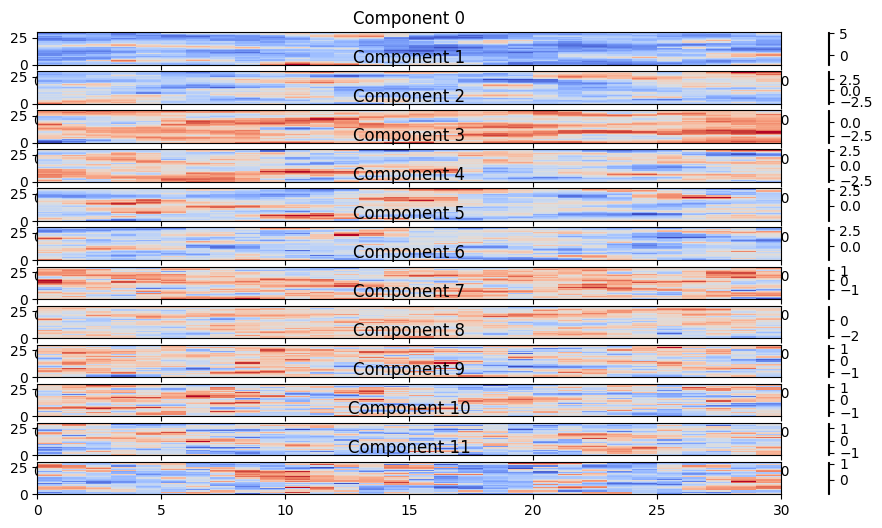

In [ ]:
plt.figure(figsize=(12, 6))

for i, c in enumerate(som.get_weights().T):
    plt.subplot(data.shape[1], 1, i+1)
    plt.pcolor(c, cmap='coolwarm')
    plt.colorbar()
    plt.title(f'Component {i}')

plt.tight_layout()
plt.show()

In [ ]:
labels['SOM_cluster'] = Som_clustering.apply(lambda x: 1 if x in clusters_above_threshold else 0)

In [ ]:
f2_scores = fbeta_score(y_train2_converted, labels['SOM_cluster'], beta=2, average=None)
print('F2 Score:')
print(f'Class Good (0): {round(f2_scores[0], 2)}')
print(f'Class Bad (1): {round(f2_scores[1], 2)}')
cm = confusion_matrix(y_train2_converted, labels['SOM_cluster'],  labels=[1, 0])
print('Confusion Matrix:\n', cm)

f2_score = fbeta_score(y_train2_converted, labels['SOM_cluster'], beta=2, average='macro')
print('Macro avg:', round(f2_score, 2))
f2_score = fbeta_score(y_train2_converted, labels['SOM_cluster'], beta=2, average='weighted')
print('Weighted avg:', round(f2_score, 2))

rate = (f2_scores[1] + f2_score)/2
print('Rate: ', round(rate,2))


report = classification_report(y_train2_converted, labels['SOM_cluster'], target_names=['Good (0)', 'Bad (1)'])
print('Classification Report:\n', report)

balanced_acc = balanced_accuracy_score(y_train2_converted, labels['SOM_cluster'])
print(f'Balanced Accuracy: {balanced_acc:.2f}')
ba_som = f2_score

F2 Score:
Class Good (0): 0.39
Class Bad (1): 0.53
Confusion Matrix:
 [[157  84]
 [362 197]]
Macro avg: 0.46
Weighted avg: 0.43
Rate:  0.48
Classification Report:
               precision    recall  f1-score   support

    Good (0)       0.70      0.35      0.47       559
     Bad (1)       0.30      0.65      0.41       241

    accuracy                           0.44       800
   macro avg       0.50      0.50      0.44       800
weighted avg       0.58      0.44      0.45       800

Balanced Accuracy: 0.50


In [ ]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.5)
y_pred = clf.fit_predict(X2_pca)
y_pred = np.where(y_pred == -1, 1, 0)
labels['LOF'] = y_pred

In [ ]:
f2_scores = fbeta_score(y_train2_converted, labels['LOF'], beta=2, average=None)
print('F2 Score:')
print(f'Class Good (0): {round(f2_scores[0], 2)}')
print(f'Class Bad (1): {round(f2_scores[1], 2)}')
cm = confusion_matrix(y_train2_converted, labels['LOF'],  labels=[1, 0])
print('Confusion Matrix:\n', cm)

f2_score = fbeta_score(y_train2_converted, labels['LOF'], beta=2, average='macro')
print('Macro avg:', round(f2_score, 2))
f2_score = fbeta_score(y_train2_converted, labels['LOF'], beta=2, average='weighted')
print('Weighted avg:', round(f2_score, 2))

rate = (f2_scores[1] + f2_score)/2
print('Rate: ', round(rate,2))

report = classification_report(y_train2_converted, labels['LOF'], target_names=['Good (0)', 'Bad (1)'])
print('Classification Report:\n', report)

balanced_acc = balanced_accuracy_score(y_train2_converted, labels['LOF'])
print(f'Balanced Accuracy: {balanced_acc:.2f}')
ba_lof = f2_score

F2 Score:
Class Good (0): 0.56
Class Bad (1): 0.5
Confusion Matrix:
 [[137 104]
 [263 296]]
Macro avg: 0.53
Weighted avg: 0.54
Rate:  0.52
Classification Report:
               precision    recall  f1-score   support

    Good (0)       0.74      0.53      0.62       559
     Bad (1)       0.34      0.57      0.43       241

    accuracy                           0.54       800
   macro avg       0.54      0.55      0.52       800
weighted avg       0.62      0.54      0.56       800

Balanced Accuracy: 0.55


In [ ]:
clf = OneClassSVM(nu=0.4, kernel="rbf", gamma=0.1)
clf.fit(X2)
y_pred = clf.predict(X2)
y_pred = np.where(y_pred == -1, 1, 0)
labels['OneClassSVM'] = y_pred

In [ ]:
f2_scores = fbeta_score(y_train2_converted, labels['OneClassSVM'], beta=2, average=None)
print('F2 Score:')
print(f'Class Good (0): {round(f2_scores[0], 2)}')
print(f'Class Bad (1): {round(f2_scores[1], 2)}')
cm = confusion_matrix(y_train2_converted, labels['OneClassSVM'],  labels=[1, 0])
print('Confusion Matrix:\n', cm)

f2_score = fbeta_score(y_train2_converted, labels['OneClassSVM'], beta=2, average='macro')
print('Macro avg:', round(f2_score, 2))
f2_score = fbeta_score(y_train2_converted, labels['OneClassSVM'], beta=2, average='weighted')
print('Weighted avg:', round(f2_score, 2))

rate = (f2_scores[1] + f2_score)/2
print('Rate: ', round(rate,2))

report = classification_report(y_train2_converted, labels['OneClassSVM'], target_names=['Good (0)', 'Bad (1)'])
print('Classification Report:\n', report)

balanced_acc = balanced_accuracy_score(y_train2_converted, labels['OneClassSVM'])
print(f'Balanced Accuracy: {balanced_acc:.2f}')
ba_oneclass = f2_score

F2 Score:
Class Good (0): 0.64
Class Bad (1): 0.43
Confusion Matrix:
 [[111 130]
 [209 350]]
Macro avg: 0.54
Weighted avg: 0.58
Rate:  0.51
Classification Report:
               precision    recall  f1-score   support

    Good (0)       0.73      0.63      0.67       559
     Bad (1)       0.35      0.46      0.40       241

    accuracy                           0.58       800
   macro avg       0.54      0.54      0.53       800
weighted avg       0.61      0.58      0.59       800

Balanced Accuracy: 0.54


In [ ]:
cov = EmpiricalCovariance().fit(X2_pca)
mean = X2_pca.mean(axis=0)

inv_cov = np.linalg.inv(cov.covariance_)
m_dist = [mahalanobis(p, mean, inv_cov) for p in X2_pca]

threshold = np.percentile(m_dist, 50)

anomalies = np.where(m_dist > threshold, 1, 0)
labels['Mahalanobis'] = anomalies

In [ ]:
f2_scores = fbeta_score(y_train2_converted, labels['Mahalanobis'], beta=2, average=None)
print('F2 Score:')
print(f'Class Good (0): {round(f2_scores[0], 2)}')
print(f'Class Bad (1): {round(f2_scores[1], 2)}')
cm = confusion_matrix(y_train2_converted, labels['Mahalanobis'],  labels=[1, 0])
print('Confusion Matrix:\n', cm)

f2_score = fbeta_score(y_train2_converted, labels['Mahalanobis'], beta=2, average='macro')
print('Macro avg:', round(f2_score, 2))
f2_score = fbeta_score(y_train2_converted, labels['Mahalanobis'], beta=2, average='weighted')
print('Weighted avg:', round(f2_score, 2))

rate = (f2_scores[1] + f2_score)/2
print('Rate: ', round(rate,2))

report = classification_report(y_train2_converted, labels['Mahalanobis'], target_names=['Good (0)', 'Bad (1)'])
print('Classification Report:\n', report)

balanced_acc = balanced_accuracy_score(y_train2_converted, labels['Mahalanobis'])
print(f'Balanced Accuracy: {balanced_acc:.2f}')
ba_mahalanobis = f2_score

F2 Score:
Class Good (0): 0.55
Class Bad (1): 0.48
Confusion Matrix:
 [[131 110]
 [269 290]]
Macro avg: 0.52
Weighted avg: 0.53
Rate:  0.5
Classification Report:
               precision    recall  f1-score   support

    Good (0)       0.72      0.52      0.60       559
     Bad (1)       0.33      0.54      0.41       241

    accuracy                           0.53       800
   macro avg       0.53      0.53      0.51       800
weighted avg       0.61      0.53      0.55       800

Balanced Accuracy: 0.53


In [ ]:
HTML(labels.to_html())

,k-means,Agglomerative,Isolation Forest,DBSCAN,SOM_cluster,LOF,OneClassSVM,Mahalanobis
29,1,1,1,1,1,1,1,1
535,0,0,0,0,1,0,0,0
695,0,0,1,1,1,1,0,1
557,1,0,1,1,1,1,0,0
836,0,0,0,0,0,0,0,0
596,0,0,0,0,0,1,0,0
165,0,0,1,0,1,1,0,1
918,0,0,1,0,1,1,0,1
495,0,0,0,0,0,0,0,0
824,0,1,0,1,0,1,0,0


In [ ]:
labels['row_sum'] = labels.sum(axis=1)

In [ ]:
HTML(labels.to_html())

,k-means,Agglomerative,Isolation Forest,DBSCAN,SOM_cluster,LOF,OneClassSVM,Mahalanobis,row_sum
29,1,1,1,1,1,1,1,1,8
535,0,0,0,0,1,0,0,0,1
695,0,0,1,1,1,1,0,1,5
557,1,0,1,1,1,1,0,0,5
836,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,1,0,0,1
165,0,0,1,0,1,1,0,1,4
918,0,0,1,0,1,1,0,1,4
495,0,0,0,0,0,0,0,0,0
824,0,1,0,1,0,1,0,0,3


In [ ]:
frequency = labels['row_sum'].value_counts(normalize=True)
print(frequency)

row_sum
1    0.18875
0    0.15625
6    0.12125
5    0.11750
8    0.10000
2    0.08375
4    0.08250
3    0.07500
7    0.07500
Name: proportion, dtype: float64


In [ ]:
y_pseudo = np.where(labels['row_sum'] >= 1, 2, 1)
labels['y_pseudo'] = y_pseudo
HTML(labels.to_html())

,k-means,Agglomerative,Isolation Forest,DBSCAN,SOM_cluster,LOF,OneClassSVM,Mahalanobis,row_sum,y_pseudo
29,1,1,1,1,1,1,1,1,8,2
535,0,0,0,0,1,0,0,0,1,2
695,0,0,1,1,1,1,0,1,5,2
557,1,0,1,1,1,1,0,0,5,2
836,0,0,0,0,0,0,0,0,0,1
596,0,0,0,0,0,1,0,0,1,2
165,0,0,1,0,1,1,0,1,4,2
918,0,0,1,0,1,1,0,1,4,2
495,0,0,0,0,0,0,0,0,0,1
824,0,1,0,1,0,1,0,0,3,2


In [ ]:
f2_scores = fbeta_score(y_train2, labels['y_pseudo'], beta=2, average=None)
print('F2 Score:')
print(f'Class Good (1): {round(f2_scores[0], 2)}')
print(f'Class Bad (2): {round(f2_scores[1], 2)}')
f2_score = fbeta_score(y_train2, labels['y_pseudo'], beta=2, average='macro')
print('Macro avg:', round(f2_score, 2))
f2_score = fbeta_score(y_train2, labels['y_pseudo'], beta=2, average='weighted')
print('Weighted avg:', round(f2_score, 2))
rate = (f2_scores[1] + f2_score)/2
print('Rate: ', round(rate,2))
cm = confusion_matrix(y_train2, labels['y_pseudo'],  labels=[2, 1])

print('Confusion Matrix:\n', cm)
report = classification_report(y_train2, labels['y_pseudo'], target_names=['Good (1)', 'Bad (2)'])
print('Classification Report:\n', report)

balanced_acc = balanced_accuracy_score(y_train2, labels['y_pseudo'])
print(f'Balanced Accuracy: {balanced_acc:.2f}')

F2 Score:
Class Good (1): 0.18
Class Bad (2): 0.62
Macro avg: 0.4
Weighted avg: 0.32
Rate:  0.47
Confusion Matrix:
 [[203  38]
 [472  87]]
Classification Report:
               precision    recall  f1-score   support

    Good (1)       0.70      0.16      0.25       559
     Bad (2)       0.30      0.84      0.44       241

    accuracy                           0.36       800
   macro avg       0.50      0.50      0.35       800
weighted avg       0.58      0.36      0.31       800

Balanced Accuracy: 0.50


In [ ]:
HTML(labels.to_html())

,k-means,Agglomerative,Isolation Forest,DBSCAN,SOM_cluster,LOF,OneClassSVM,Mahalanobis,row_sum,y_pseudo
29,1,1,1,1,1,1,1,1,8,2
535,0,0,0,0,1,0,0,0,1,1
695,0,0,1,1,1,1,0,1,5,1
557,1,0,1,1,1,1,0,0,5,1
836,0,0,0,0,0,0,0,0,0,1
596,0,0,0,0,0,1,0,0,1,1
165,0,0,1,0,1,1,0,1,4,1
918,0,0,1,0,1,1,0,1,4,1
495,0,0,0,0,0,0,0,0,0,1
824,0,1,0,1,0,1,0,0,3,1


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 100}
Training F2 Score: 0.93
Validation F2 Score: 0.16
Validation Accuracy: 0.69
Confusion Matrix:
 [[  8  51]
 [ 10 131]]
F2 Score:
Class Good (1): 0.88
Class Bad (2): 0.16
Macro avg: 0.52
Weighted avg: 0.67
Classification Report:
               precision    recall  f1-score   support

    Good (1)       0.72      0.93      0.81       141
     Bad (2)       0.44      0.14      0.21        59

    accuracy                           0.69       200
   macro avg       0.58      0.53      0.51       200
weighted avg       0.64      0.69      0.63       200

Balanced Accuracy: 0.53
AUC-ROC: 0.57


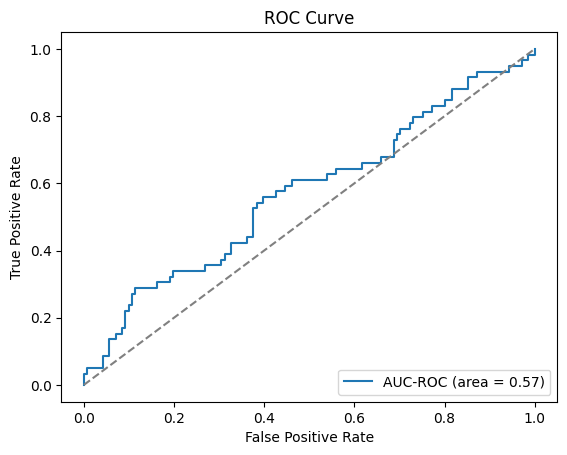

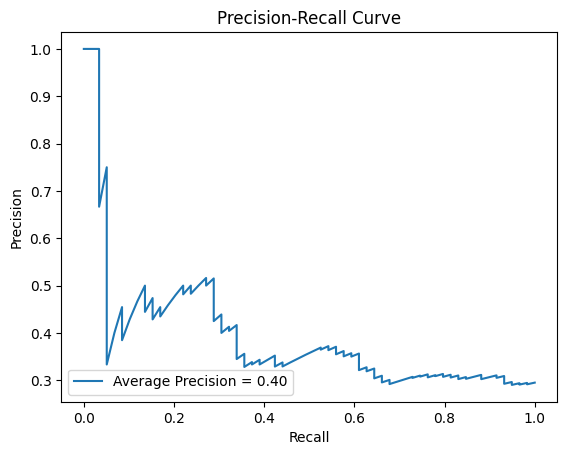

In [ ]:
class_weights = {
    1: 1,
    2: 5
}
def f2_class_2(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, pos_label=2, average='binary')

f2_scorer_class_2 = make_scorer(f2_class_2)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['sqrt', 'log2', 'auto']
}

rf_model = RandomForestClassifier(class_weight=class_weights, random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring=f2_scorer_class_2, n_jobs=-1, verbose=2)

grid_search.fit(X2, labels['y_pseudo'])

best_rf_model = grid_search.best_estimator_

print(f'Best Hyperparameters: {grid_search.best_params_}')

y_val_pred = best_rf_model.predict(X_val_scaled2)
y_val_pred_proba = best_rf_model.predict_proba(X_val_scaled2)[:, 1]

y_train_pred = grid_search.best_estimator_.predict(X2)
train_f2_score = fbeta_score(labels['y_pseudo'], y_train_pred, beta=2, average='binary', pos_label=2)

val_f2_score = fbeta_score(y_val2, y_val_pred, beta=2, average='binary', pos_label=2)

print(f'Training F2 Score: {train_f2_score:.2f}')
print(f'Validation F2 Score: {val_f2_score:.2f}')

accuracy = accuracy_score(y_val2, y_val_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_val2, y_val_pred, labels = [2,1])
print('Confusion Matrix:\n', cm)

f2_scores = fbeta_score(y_val2, y_val_pred, beta=2, average=None)
print('F2 Score:')
print(f'Class Good (1): {round(f2_scores[0], 2)}')
print(f'Class Bad (2): {round(f2_scores[1], 2)}')

f2_score = fbeta_score(y_val2, y_val_pred, beta=2, average='macro')
print('Macro avg:', round(f2_score, 2))

f2_score = fbeta_score(y_val2, y_val_pred, beta=2, average='weighted')
print('Weighted avg:', round(f2_score, 2))

report = classification_report(y_val2, y_val_pred, target_names=['Good (1)', 'Bad (2)'])
print('Classification Report:\n', report)

balanced_acc = balanced_accuracy_score(y_val2, y_val_pred)
print(f'Balanced Accuracy: {balanced_acc:.2f}')

roc_auc = roc_auc_score(y_val2, y_val_pred_proba)
print(f'AUC-ROC: {roc_auc:.2f}')

fpr, tpr, _ = roc_curve(y_val2, y_val_pred_proba, pos_label=2)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC-ROC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

precision, recall, _ = precision_recall_curve(y_val2, y_val_pred_proba, pos_label=2)
avg_precision = average_precision_score(y_val2, y_val_pred_proba, pos_label=2)
plt.figure()
plt.plot(recall, precision, label=f'Average Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()